In [6]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [7]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read and display the CSV data
for file_name in uploaded.keys():
    print(f'Uploaded file: {file_name}')

    # Read CSV into DataFrame
    df = pd.read_csv(file_name)

    # Display the first 5 rows of the dataset
    print(df.head())


Saving Delinquency_prediction_dataset.csv to Delinquency_prediction_dataset (1).csv
Uploaded file: Delinquency_prediction_dataset (1).csv
  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583 

In [8]:
# Dataset info — data types and non-null counts
print("\n Dataset Info:")
print(df.info())



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3

In [9]:

# Check for missing values
print("\n Missing Values in Each Column:")
print(df.isnull().sum())



 Missing Values in Each Column:
Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64


In [10]:
#  Data types
print("\n📊 Data Types:")
print(df.dtypes)


📊 Data Types:
Customer_ID              object
Age                       int64
Income                  float64
Credit_Score            float64
Credit_Utilization      float64
Missed_Payments           int64
Delinquent_Account        int64
Loan_Balance            float64
Debt_to_Income_Ratio    float64
Employment_Status        object
Account_Tenure            int64
Credit_Card_Type         object
Location                 object
Month_1                  object
Month_2                  object
Month_3                  object
Month_4                  object
Month_5                  object
Month_6                  object
dtype: object


In [11]:

# Describe numerical columns
print("\n Summary Statistics:")
print(df.describe())




 Summary Statistics:
              Age         Income  Credit_Score  Credit_Utilization  \
count  500.000000     461.000000    498.000000          500.000000   
mean    46.266000  108379.893709    577.716867            0.491446   
std     16.187629   53662.723741    168.881211            0.197103   
min     18.000000   15404.000000    301.000000            0.050000   
25%     33.000000   62295.000000    418.250000            0.356486   
50%     46.500000  107658.000000    586.000000            0.485636   
75%     59.250000  155734.000000    727.250000            0.634440   
max     74.000000  199943.000000    847.000000            1.025843   

       Missed_Payments  Delinquent_Account  Loan_Balance  \
count       500.000000          500.000000    471.000000   
mean          2.968000            0.160000  48654.428875   
std           1.946935            0.366973  29395.537273   
min           0.000000            0.000000    612.000000   
25%           1.000000            0.000000  237

In [12]:
#  Skewness of numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\n📈 Skewness of Numerical Columns:")
print(df[numerical_cols].skew())


📈 Skewness of Numerical Columns:
Age                    -0.077672
Income                  0.046087
Credit_Score           -0.034056
Credit_Utilization      0.119865
Missed_Payments        -0.036643
Delinquent_Account      1.860438
Loan_Balance            0.105197
Debt_to_Income_Ratio    0.057659
Account_Tenure         -0.085426
dtype: float64


In [13]:
#  Outlier detection using IQR
print("\n Outlier Counts (using IQR method):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))].shape[0]
    print(f"{col}: {outliers} outliers")


 Outlier Counts (using IQR method):
Age: 0 outliers
Income: 0 outliers
Credit_Score: 0 outliers
Credit_Utilization: 0 outliers
Missed_Payments: 0 outliers
Delinquent_Account: 80 outliers
Loan_Balance: 0 outliers
Debt_to_Income_Ratio: 0 outliers
Account_Tenure: 0 outliers


In [14]:
# Unique values in categorical columns
categorical_columns = ['Customer_ID', 'Employment_Status', 'Credit_Card_Type', 'Location',
                       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']

for col in categorical_columns:
    if col in df.columns:
        print(f"\n Unique values in {col}:")
        print(df[col].unique())


 Unique values in Customer_ID:
['CUST0001' 'CUST0002' 'CUST0003' 'CUST0004' 'CUST0005' 'CUST0006'
 'CUST0007' 'CUST0008' 'CUST0009' 'CUST0010' 'CUST0011' 'CUST0012'
 'CUST0013' 'CUST0014' 'CUST0015' 'CUST0016' 'CUST0017' 'CUST0018'
 'CUST0019' 'CUST0020' 'CUST0021' 'CUST0022' 'CUST0023' 'CUST0024'
 'CUST0025' 'CUST0026' 'CUST0027' 'CUST0028' 'CUST0029' 'CUST0030'
 'CUST0031' 'CUST0032' 'CUST0033' 'CUST0034' 'CUST0035' 'CUST0036'
 'CUST0037' 'CUST0038' 'CUST0039' 'CUST0040' 'CUST0041' 'CUST0042'
 'CUST0043' 'CUST0044' 'CUST0045' 'CUST0046' 'CUST0047' 'CUST0048'
 'CUST0049' 'CUST0050' 'CUST0051' 'CUST0052' 'CUST0053' 'CUST0054'
 'CUST0055' 'CUST0056' 'CUST0057' 'CUST0058' 'CUST0059' 'CUST0060'
 'CUST0061' 'CUST0062' 'CUST0063' 'CUST0064' 'CUST0065' 'CUST0066'
 'CUST0067' 'CUST0068' 'CUST0069' 'CUST0070' 'CUST0071' 'CUST0072'
 'CUST0073' 'CUST0074' 'CUST0075' 'CUST0076' 'CUST0077' 'CUST0078'
 'CUST0079' 'CUST0080' 'CUST0081' 'CUST0082' 'CUST0083' 'CUST0084'
 'CUST0085' 'CUST0086' 'CUST00

In [15]:
#  Class imbalance check for target and categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Delinquent_Account' in df.columns:
    categorical_cols.append('Delinquent_Account')

print("\n Value Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


 Value Counts for Categorical Columns:

Customer_ID:
Customer_ID
CUST0500    1
CUST0001    1
CUST0002    1
CUST0003    1
CUST0484    1
           ..
CUST0009    1
CUST0008    1
CUST0007    1
CUST0006    1
CUST0005    1
Name: count, Length: 500, dtype: int64

Employment_Status:
Employment_Status
Unemployed       93
retired          87
Employed         82
EMP              81
Self-employed    80
employed         77
Name: count, dtype: int64

Credit_Card_Type:
Credit_Card_Type
Gold        118
Student     112
Business    108
Standard     86
Platinum     76
Name: count, dtype: int64

Location:
Location
Los Angeles    107
Phoenix        103
Chicago        103
Houston         95
New York        92
Name: count, dtype: int64

Month_1:
Month_1
On-time    177
Missed     164
Late       159
Name: count, dtype: int64

Month_2:
Month_2
Late       173
Missed     167
On-time    160
Name: count, dtype: int64

Month_3:
Month_3
Late       169
On-time    169
Missed     162
Name: count, dtype: int64

Month_

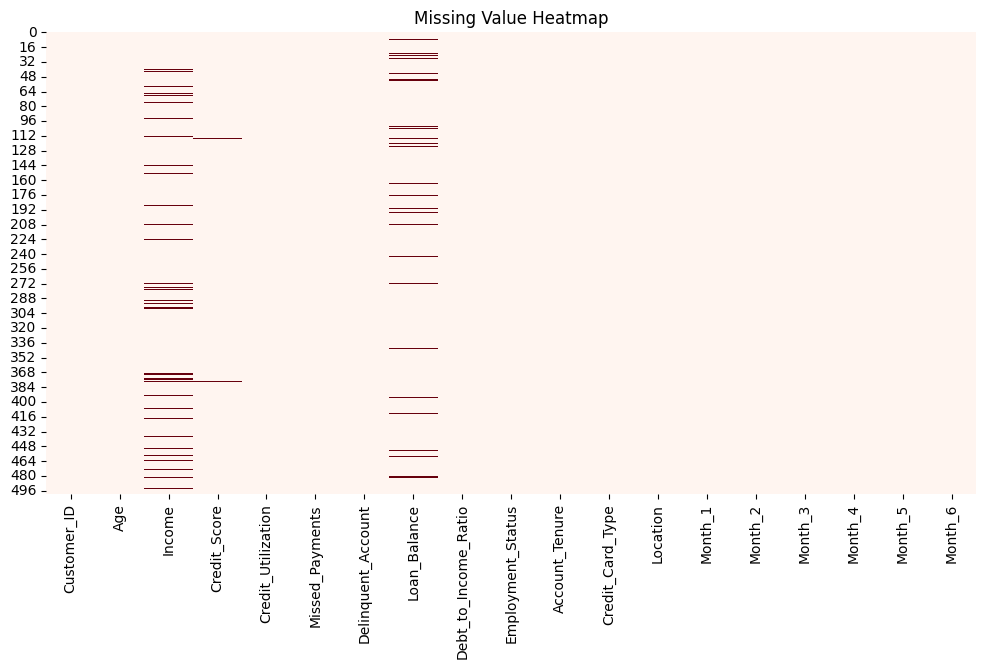

In [16]:

#  Visualizations (optional)
import warnings
warnings.filterwarnings('ignore')

# Missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Value Heatmap')
plt.show()

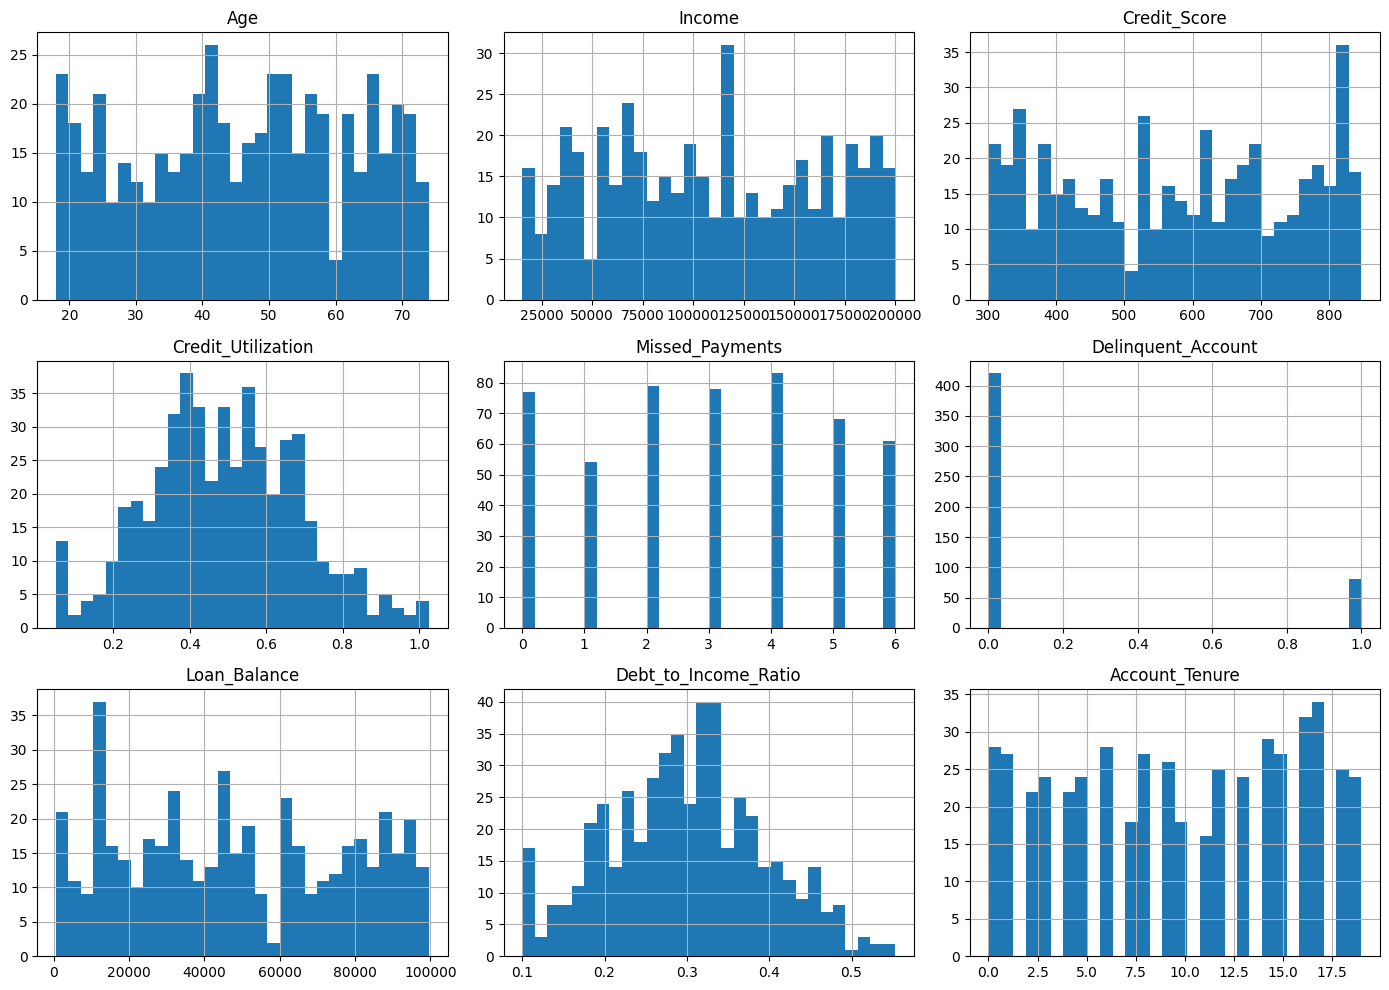

In [17]:
# Numerical feature distribution plots
df[numerical_cols].hist(figsize=(14,10), bins=30)
plt.tight_layout()
plt.show()

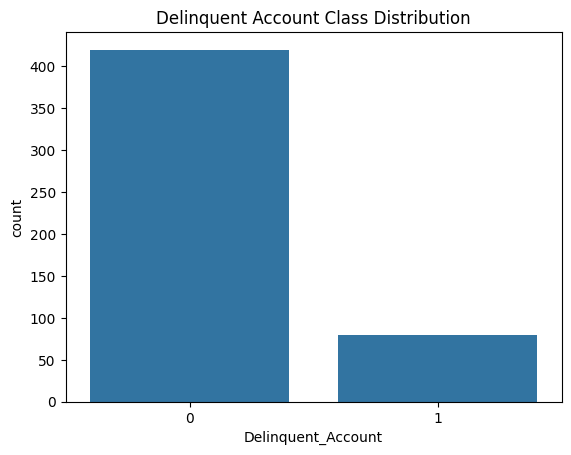

In [18]:
# Delinquent_Account class imbalance plot (if exists)
if 'Delinquent_Account' in df.columns:
    sns.countplot(x='Delinquent_Account', data=df)
    plt.title('Delinquent Account Class Distribution')
    plt.show()


 Top 10 Important Features:
                 Feature  Importance
5           Loan_Balance    0.101867
1                 Income    0.097257
2           Credit_Score    0.096559
6   Debt_to_Income_Ratio    0.084931
0                    Age    0.083352
3     Credit_Utilization    0.083024
7         Account_Tenure    0.075138
4        Missed_Payments    0.048764
26       Month_3_On-time    0.019375
29        Month_5_Missed    0.018468


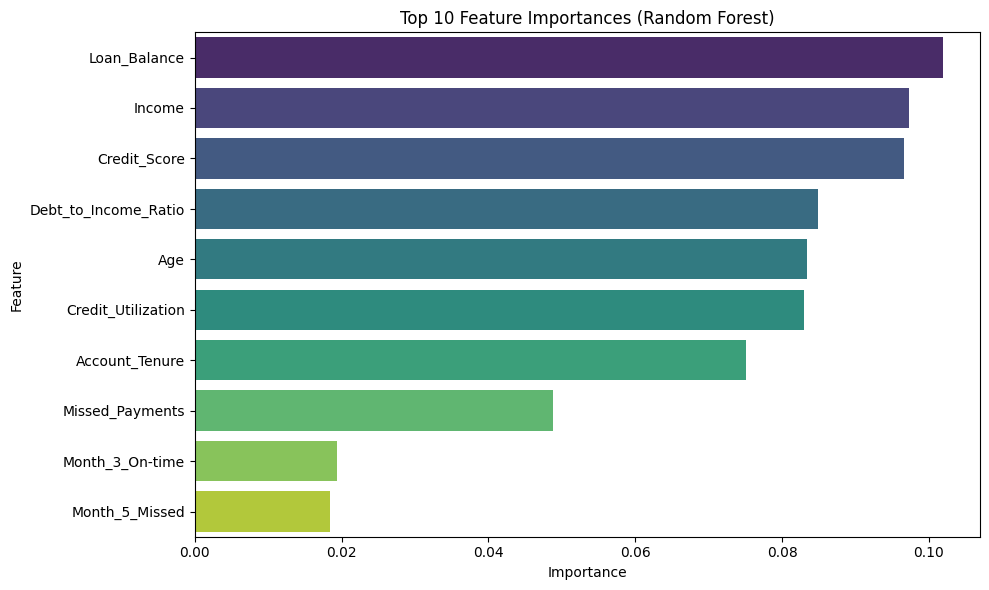


 Training Accuracy: 1.0000
 Test Accuracy: 0.8400


In [19]:
# Define features (X) and target (y)
# Drop 'Customer_ID' column as it's a unique identifier and not a feature
X = df.drop(['Delinquent_Account', 'Customer_ID'], axis=1)
y = df['Delinquent_Account']

# Select categorical columns in X
categorical_cols_in_X = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns in X
# This converts categorical variables into dummy/indicator variables
X = pd.get_dummies(X, columns=categorical_cols_in_X, drop_first=True) # Use drop_first to avoid multicollinearity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Now X_train should only contain numerical data after one-hot encoding
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("\n Top 10 Important Features:")
print(importance_df.head(10))

# 📈 Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 📊 Optional: show model accuracy
print(f"\n Training Accuracy: {model.score(X_train, y_train):.4f}")
print(f" Test Accuracy: {model.score(X_test, y_test):.4f}")

In [20]:
from sklearn.impute import SimpleImputer

#  Median imputation for numerical features
num_cols = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization',
            'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

#  Zero or median for 'Missed_Payments'
df['Missed_Payments'] = df['Missed_Payments'].fillna(0)

#  Mode imputation for categorical features
cat_cols = ['Employment_Status', 'Credit_Card_Type', 'Location',
            'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

#  If Delinquent_Account has missing values
if df['Delinquent_Account'].isnull().sum() > 0:
    df['Delinquent_Account'] = df['Delinquent_Account'].fillna(0)


In [21]:
# Median imputation for numerical features
num_cols = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization',
            'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [22]:
import numpy as np
import pandas as pd

# Assume df is your DataFrame and Income has missing values
# Step 1: Compute parameters from existing values
income_mean = df['Income'].mean()
income_std = df['Income'].std()
missing_count = df['Income'].isnull().sum()

# Step 2: Generate synthetic income values
synthetic_incomes = np.random.normal(loc=income_mean, scale=income_std, size=missing_count)

# Optional: Avoid negative or implausible values (clip to a minimum reasonable income)
synthetic_incomes = np.clip(synthetic_incomes, a_min=10000, a_max=None)

# Step 3: Replace missing values with generated ones
df.loc[df['Income'].isnull(), 'Income'] = synthetic_incomes

# 📌 Check result
print(df['Income'].isnull().sum())
print(df['Income'].describe())


0
count       500.000000
mean     108323.586000
std       51523.389667
min       15404.000000
25%       67610.500000
50%      107658.000000
75%      152572.250000
max      199943.000000
Name: Income, dtype: float64


In [23]:
df.shape[0]

500

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100

Logistic Regression ROC-AUC: 0.5249169435215946
Random Forest ROC-AUC: 0.40531561461794013


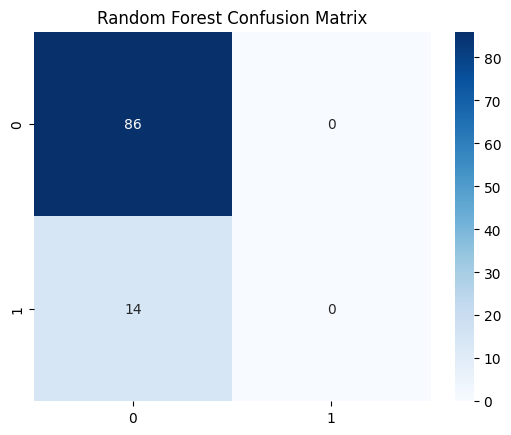

In [24]:

# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Load dataset
df = pd.read_csv('Delinquency_prediction_dataset.csv')

# 📌 Select relevant features (based on EDA insights)
selected_features = ['Missed_Payments', 'Credit_Utilization', 'Credit_Score',
                     'Debt_to_Income_Ratio', 'Income']

X = df[selected_features]
y = df['Delinquent_Account']

# 📌 Handle missing values (simple imputation as placeholder)
X = X.fillna(X.mean())

# 📊 Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📈 Model 1: Logistic Regression (Simple, interpretable)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# 📈 Model 2: Random Forest Classifier (More powerful, handles non-linearities)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 📊 Evaluate models
print("Logistic Regression Performance:")
print(classification_report(y_test, log_preds))

print("Random Forest Classifier Performance:")
print(classification_report(y_test, rf_preds))

# 📈 ROC-AUC Scores
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# 📉 Confusion Matrix Visualization (Optional)
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


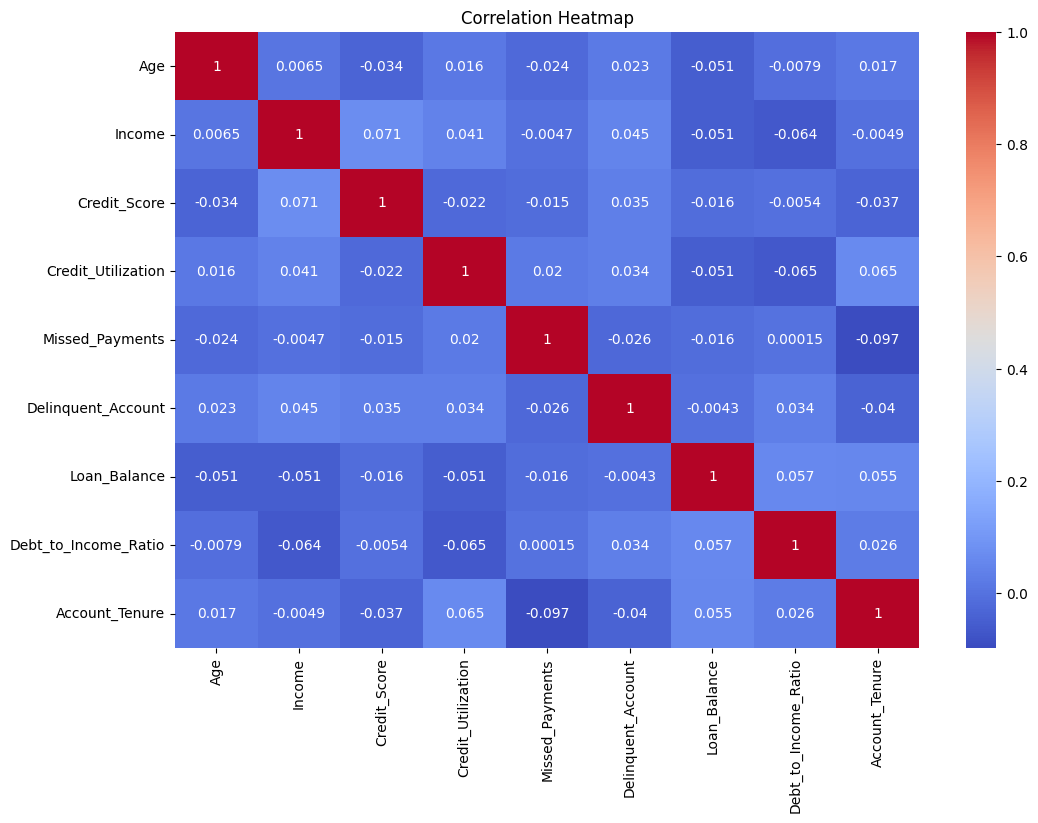

Selected Top Features: ['Income', 'Credit_Utilization', 'Missed_Payments', 'Debt_to_Income_Ratio', 'Loan_Balance']


In [27]:
# Correlation heatmap to check relationships with Delinquent_Account
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Based on correlation, or domain knowledge, pick top 5 features
top_features = ['Income', 'Credit_Utilization', 'Missed_Payments', 'Debt_to_Income_Ratio', 'Loan_Balance']
print("Selected Top Features:", top_features)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Feature and target selection
X = df[top_features]
y = df['Delinquent_Account']

# Handle missing values (simple fill for now)
X = X.fillna(X.median())

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Optional: Feature importance from Random Forest
import pandas as pd
import numpy as np

feature_importances = pd.Series(rf_model.feature_importances_, index=top_features).sort_values(ascending=False)
print("\nRandom Forest Feature Importances:")
print(feature_importances)


Logistic Regression Accuracy: 0.86
Random Forest Accuracy: 0.86

Random Forest Feature Importances:
Credit_Utilization      0.238036
Debt_to_Income_Ratio    0.226276
Income                  0.224329
Loan_Balance            0.218011
Missed_Payments         0.093348
dtype: float64


Accuracy: 0.86
F1 Score: 0.0
ROC AUC Score: 0.4277408637873754


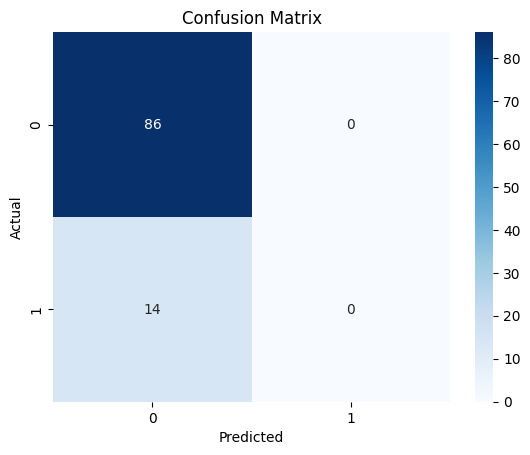

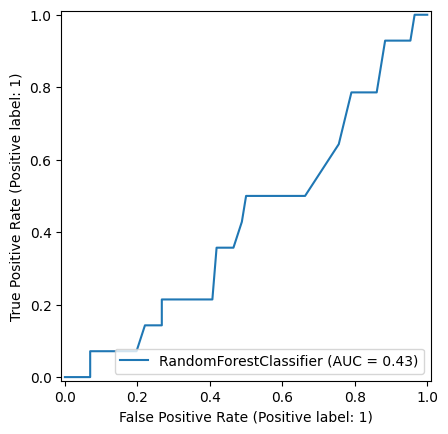

In [29]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt

# Evaluate Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()


Accuracy: 0.86
F1 Score: 0.0
ROC AUC Score: 0.4277408637873754


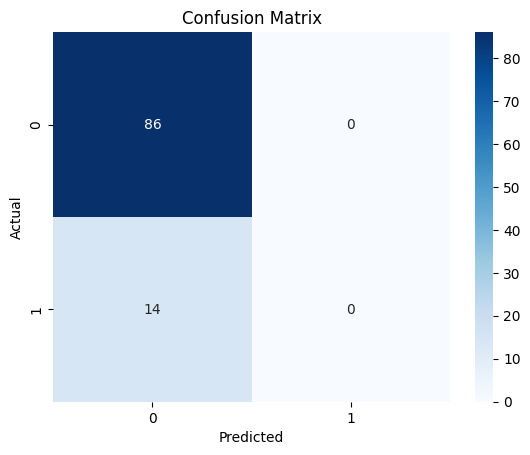

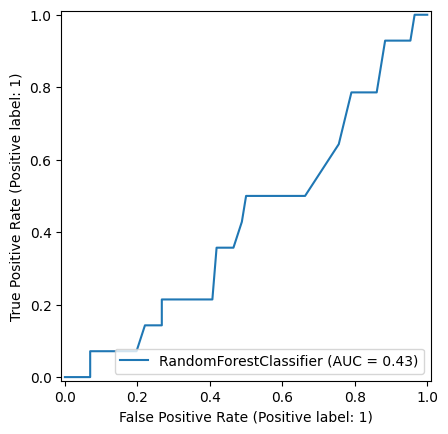

Accuracy for EMP: 0.75
Accuracy for Self-employed: 0.82
Accuracy for Unemployed: 0.83
Accuracy for employed: 0.90
Accuracy for Employed: 0.88
Accuracy for retired: 1.00


In [31]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt

# Evaluate Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()

# Get the original indices of the test set
test_indices = X_test.index

for group in df['Employment_Status'].unique():
    # Create a boolean mask for the original dataframe based on Employment_Status
    original_group_mask = df['Employment_Status'] == group

    # Filter this mask to include only the indices that are in the test set
    # This creates a boolean mask that is True for rows in the test set *and* belonging to the current group
    test_group_mask = original_group_mask.loc[test_indices]

    # Calculate accuracy only for the rows in the test set that belong to the current group
    # Use the test_group_mask to index both y_test and y_pred_rf
    # Check if the test_group_mask is not empty before calculating accuracy
    if test_group_mask.any():
        acc = accuracy_score(y_test[test_group_mask], y_pred_rf[test_group_mask])
        print(f"Accuracy for {group}: {acc:.2f}")
    else:
        print(f"No samples for {group} in the test set.")